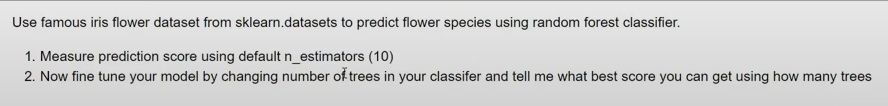

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
df['target'] = iris.target

In [13]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target', 'flower_name'], axis='columns'), df.target, test_size=0.2)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
model.score(X_test, y_test)*100

93.33333333333333

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))

Text(95.72222222222221, 0.5, 'Truth')

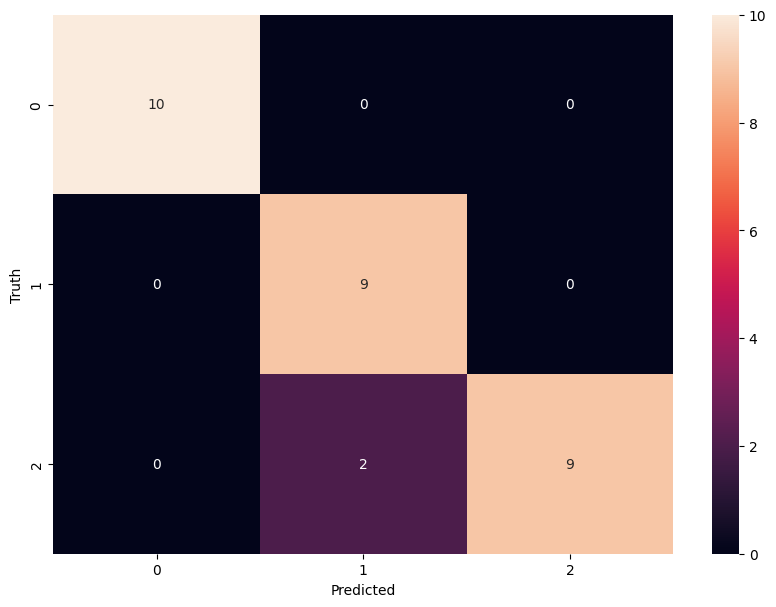

In [38]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')